### 笔考察点：
1. 数据结构设计
2. 代码质量 
3. 代码性能

#### 提示 ：每个题目请使用标记为“作答”的cell进行代码编写，保留最终程序代码，代码调试过程或无效代码请删除

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import ANY OTHER YOU NEED

#### 1. 读取文件data.xlsx
    提示：这是某设备采集的实际测量数据，一个文件中包含5组测量值，因此该文件总共有5个sheet，sheet名为相应的测量ID；每个sheet又分别记录了DATA_X和DATA_Y的数据，均为 19*15 的矩阵，代表了在总共200*96区域内285个测试坐标点所对应的X, Y方向的数值。
    要求：读取全部5个sheet的DATA_X和DATA_Y总共10个 19*15 的矩阵的数据进入内存 (数据结构不限)。

In [99]:
%%time
## 1 作答:
io = pd.io.excel.ExcelFile("./data.xlsx")
def read_data(io=None):
    if not io:
        raise IOError("Please enter your dataset path!")
    data = pd.read_excel(io=io, sheetname=None)
    res = []
    for each in data:
        sheet = data[each].T
        dx, dy = sheet.iloc[2:17,1:], sheet.iloc[17:, 1:]
        dx.set_index([np.tile(["DATA X"],15),np.repeat(["C1","C2","C3","C4","C5"],3)], inplace=True)
        dx.columns=["M"+str(i) for i in range(1,20)]
        dy.set_index([np.tile(["DATA Y"],15),np.repeat(["C1","C2","C3","C4","C5"],3)], inplace=True)
        dy.columns=["M"+str(i) for i in range(1,20)]
        res.append((dx,dy))
    return res
res = read_data(io)
print(res)

[(            M1   M2   M3   M4   M5   M6   M7   M8   M9  M10  M11  M12  M13  \
DATA X C1  3.6  3.2  5.2  2.8  2.5  2.1  0.4 -0.3 -1.9 -2.4 -1.4 -2.1 -0.7   
       C1  5.1  4.3    6  3.7  3.3  2.5  1.3  0.5 -0.6 -1.3 -0.8 -0.7 -0.2   
       C1  5.5  4.3  6.3  3.4    3  2.5  1.5  0.8 -0.2 -0.8 -0.2 -0.8  0.1   
       C2  4.1  2.4  4.5  1.5  1.4  0.6    0 -0.8 -1.7 -2.2 -1.8 -2.1 -1.7   
       C2  4.4  2.4  3.9  1.6  0.9  0.9  0.1 -1.2 -1.4 -1.2 -1.4 -1.8 -1.4   
       C2  5.9  3.2    5  2.1  1.6  2.1  1.1  0.4  0.5  0.1  0.3 -0.3 -0.2   
       C3  4.7  1.8  3.4    1  0.3  0.6 -0.1 -0.7 -0.9   -1 -0.8 -1.6 -1.6   
       C3    5  2.5  3.6  1.3  0.7  1.6  0.8  0.2  0.3  0.5    0 -0.4 -1.1   
       C3  6.4  3.7  4.4  1.7  1.7  2.4  2.2  1.3  2.3  2.1  1.7  0.8    0   
       C4  4.7  1.9  2.5  0.4  0.1  0.8  0.5 -0.2  0.7  0.8  0.5 -0.9 -1.5   
       C4  4.9    2  2.6  1.3  0.5  1.8  1.9  0.8  2.7  2.1  1.1 -0.2 -0.9   
       C4  4.9  2.2  2.8    1  0.7  1.8  2.8  1.4  3.9  3.3  2

#### 2. 将读入的数据转换为如下结构的一张表，并存成一个csv文件
    提示：
    1. 读入的数据转换结构的 columns 为 ['ID', 'POS_X', 'POS_Y', 'DATA_X', 'DATA_Y'] ,shape 为 (1425, 5)
    2. ID (str) 的取值应为文件中的5个测量ID
    3. POS_X (int) 的取值为1~19，POS_Y (int) 的取值为1~15 (即的DATA_X/DATA_Y数据点所在矩阵的行/列)。
    4. DATA_X/DATA_Y (float) 的值即为（POS_X，POS_Y）坐标所对应的DATA_X 和 DATA_Y的数值

In [111]:
%%time
## 2 作答:  
sheetnames = ["L1", "L2", "L3", "L4", "L5"]
def concat_data(data, sheets=sheetnames):
    sheet_c, col = 0, 1
    res = []
    for j in range(len(sheets)):
        x = data[sheet_c][0].loc["DATA X"].T
        y = data[sheet_c][1].loc["DATA Y"].T
        for i in range(15):
            dx = pd.DataFrame(x.iloc[:,i].values, columns=["DATA_X"])
            dy = pd.DataFrame(y.iloc[:,i].values, columns=["DATA_Y"])
            posx = pd.DataFrame([ix for ix in range(1,20)])
            posy = pd.DataFrame([col for _ in range(19)])
            Id = pd.DataFrame([sheetnames[sheet_c] for _ in range(19)])
            con = pd.concat([Id, posx, posy, dx, dy], axis=1)
            col += 1
            if col == 16:
                col = 1
            res.append(con)
        sheet_c += 1
    return pd.concat(res)
data = concat_data(res, sheetnames)
data.columns=["ID", "POS_X", "POS_Y", "DATA_X", "DATA_Y"]
data.to_csv("output.csv")
print(data)

    ID  POS_X  POS_Y DATA_X DATA_Y
0   L1      1      1    3.6    2.7
1   L1      2      1    3.2    2.2
2   L1      3      1    5.2    2.3
3   L1      4      1    2.8    3.4
4   L1      5      1    2.5    1.7
5   L1      6      1    2.1    1.5
6   L1      7      1    0.4    1.4
7   L1      8      1   -0.3    0.1
8   L1      9      1   -1.9   -0.5
9   L1     10      1   -2.4    1.8
10  L1     11      1   -1.4    0.1
11  L1     12      1   -2.1    1.9
12  L1     13      1   -0.7    0.5
13  L1     14      1    1.1    1.1
14  L1     15      1    0.8      0
15  L1     16      1    2.1    2.4
16  L1     17      1    1.3    1.9
17  L1     18      1   -1.2    0.8
18  L1     19      1    2.1    2.4
0   L1      1      2    5.1      2
1   L1      2      2    4.3    1.8
2   L1      3      2      6    1.2
3   L1      4      2    3.7    1.9
4   L1      5      2    3.3    1.7
5   L1      6      2    2.5    0.7
6   L1      7      2    1.3   -0.6
7   L1      8      2    0.5   -0.4
8   L1      9      2

#### 3. 撰写如下要求的函数，并调用函数执行结果
    函数要求：
    函数名称为 ControlFunc
    函数Inputs (形参名称(类型)/ 备注):
    1)path(str) / 第2题所生成的csv文件路径
    2)ID(str) / 所选取的测量ID
    3)DATA(str) / 需返回DATA_X还是DATA_Y
    4)Control(float) / 管控值(函数需设置默认参数为3.25)
    
    函数Outputs :
    1)返回两个量, 是由Inputs所决定DATA数值超出(不含边界值) 正负 管控值的数量和比例
    
    其他：
    1)若第2，3个Inputs的值不在表中，需打印出错误信息 并直接返回
    2)主程序调用上述函数，生成所有测量ID数据 超出管控值的报告，存成csv文件如下结构 shape为(10,4)
    
    ID	DATA	NUMBER	RATIO
    L1	DATA_X		
    L1	DATA_Y		
    …	…	…	…
    L5	DATA_X		
    L5	DATA_Y		

In [114]:
%%time
## 3 作答:  
def ControlFunc(path, ID, DATA, Control):
    data = pd.read_csv(path)
    if (DATA not in data.columns) or (ID not in data["ID"].value_counts().index):
        print("key Error.")
        return 0,0
    df = data[data["ID"]==ID][DATA]
    mnt = len(df[df>Control])
    total = len(df)
    return mnt, mnt*1.0/ total
mnt, rate = ControlFunc("output.csv", ID="L1", DATA="DATA_X", Control=3.25)
print(mnt, rate)

(33, 0.11578947368421053)
CPU times: user 4.97 ms, sys: 1.06 ms, total: 6.03 ms
Wall time: 5.59 ms


#### 4.  撰写如下要求函数，并调用函数执行结果
    提示：已知原始excel文件中, M19~M1对应的是X方向的ID，标号为ABCDEFGHIJKLMNOPQRS; C5~C1对应是Y方向的ID，标号为ABCDE，即M19/C4所在区域，对应的XY方向的ID为'AB'。请计算全部ID所对应区域的DATA数值，根据指定方法的计算值
    
    函数要求：
    函数名称为 CalFunc
    函数Inputs (形参名称(类型)/ 备注):
    1)path(str) / 第2题所生成的csv文件路径
    2)ID(str) / 所选取的测量ID
    3)DATA(str) / 需返回DATA_X还是DATA_Y
    4)Func(str/function) / M/C对应区域的数据的计算方法: 
        若实参为str类型, 只能是以下方法/ {'mean','sum','median','max','min','first','last'}
        若实参为function类型, 可以直接作为指定计算方法被使用
        若两者类型都不是, 需要提示用于输入类型有误 并直接返回
        
    函数Outputs :
    1)返回一个由Inputs所生成的矩阵(类型为DataFrame),index='ABCDE',columns='ABCDEFGHIJKLMNOPQRS',shape为(5,19)
    
    其他：
    1)若第2，3，4个Inputs的值若输入有误，需打印出错误信息 并直接返回
    2)主程序调用上述函数，打印出全部10个 5*19 的DataFrame (Func 使用sum)

In [115]:
%%time
## 4 作答:  
indexs= "A B C D E".split()[::-1]
columns = "A B C D E F G H I J K L M N O P Q R S".split()[::-1]
def CalFunc(path, ID, DATA, Func=np.sum):
    funs = {'mean': np.mean,'sum': np.sum,'median': np.median,'max': np.max,'min' : np.min}
    if isinstance(Func, str):
        Func = funs[Func]
    data = pd.read_csv(path, usecols=["ID","POS_X","POS_Y",DATA])
    if (DATA not in data.columns) or (ID not in data["ID"].value_counts().index):
        print("key Error.")
        return 0
    data = data[data["ID"]==ID].T
    counter = 0
    res = []
    for i in range(5):
        a = pd.DataFrame(data.iloc[:,counter:counter+19].values)
        b = pd.DataFrame(data.iloc[:,counter+19:counter+38].values)
        c = pd.DataFrame(data.iloc[:,counter+38:counter+57].values)
        df = pd.concat([a,b,c])
        df = df.drop([0,1,2])
        df = df.apply(lambda x:Func(x))
        counter += 57
        res.append(df)
    result = pd.concat(res,axis=1).T
    result.columns=columns
    result.index=indexs
    return result

def main4(path, means=np.sum):
    xory = ["DATA_X", "DATA_Y"]
    IDs =["L1", "L2", "L3", "L4", "L5"]
    for ids in IDs:
        for xy in xory:
            print(CalFunc(path, ids, xy, means))
main4("output.csv")

      S     R     Q    P    O    N    M    L     K    J    I    H    G    F  \
E  14.2  11.8  17.5  9.9  8.8  7.1  3.2  1.0  -2.7 -4.5 -2.4 -3.6 -0.8  5.1   
D  14.4   8.0  13.4  5.2  3.9  3.6  1.2 -1.6  -2.6 -3.3 -2.9 -4.2 -3.3  1.2   
C  16.1   8.0  11.4  4.0  2.7  4.6  2.9  0.8   1.7  1.6  0.9 -1.2 -2.7  0.3   
B  14.5   6.1   7.9  2.7  1.3  4.4  5.2  2.0   7.3  6.2  3.8 -0.9 -2.6 -1.1   
A   9.9   2.2   3.5 -2.1 -2.3  1.4  5.8  1.8  10.4  7.8  3.9 -2.4 -5.4 -4.5   

     E    D    C    B    A  
E  3.8  6.7  6.3 -0.4  6.7  
D  0.6  2.5  1.9 -4.4  2.5  
C  0.9  0.8  0.5 -6.5  0.8  
B -1.9 -0.3 -1.6 -6.9 -0.3  
A -6.1 -3.1 -6.1 -9.8 -3.1  
     S    R    Q    P    O    N    M    L    K    J    I    H    G    F    E  \
E  6.7  6.0  4.5  6.3  5.0  2.4 -0.7 -1.0 -2.1  3.5  1.7  4.9  0.4  1.7 -2.0   
D  5.5  4.0  2.2  2.6  4.4 -0.5 -4.6 -2.5 -2.6  3.5  2.0  2.4 -0.9 -1.0 -2.7   
C  3.8  3.7  4.9  4.2  5.2  2.0 -1.7 -1.1  0.4  7.0  2.6  0.1  0.9  1.3 -2.9   
B  7.6  3.0  5.1  3.9  3.8  0.6

#### 5. 数据可视化
    提示: 已知测量区域大小为200*96，即X方向坐标为[-100,100], Y方向坐标为[-48, 48]，原始19*15的测试点均匀分布在XY平面。
    
    5.1 函数要求：
    函数名称为 PlotFunc
    函数Inputs (形参名称(类型)/ 备注):
    1)path(str) / 第2题所生成的csv文件路径
    2)ID(str) / 所选取的测量ID
    3)DATA(str) / 需返回DATA_X还是DATA_Y
   
    函数Outputs :
    1)选用合适的可视化方式展现Inputs所对应的数据，并在XY轴上标注ID: X方向为'ABCDEFGHIJKLMNOPQRS'， Y方向为'ABCDE'
    
    5.2 函数要求：
    函数名称为 BoxplotFunc, 
    要求：选取任意数量的测量ID，用箱线图比较不同测量ID按X方向或Y方向聚合的分布情况
    
    函数Inputs (形参名称(类型)/ 备注):
    1)path(str) / 第2题所生成的csv文件路径
    2)IDs(list) / 所选取的测量ID
    3)DATA(str) / 需返回DATA_X还是DATA_Y
    4)POS (str) / 按POS_X还是POS_Y对数据进行聚合
   
    函数Outputs :
    1)用箱线图比较Inputs所对应的数据，其中X轴为X方向或Y方向的ID， Y轴为所选取的数值（DATA_X或DATA_Y）


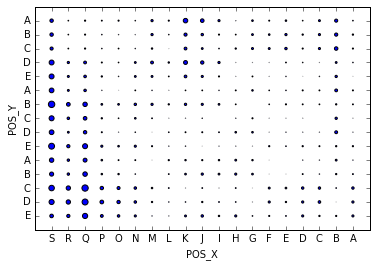

CPU times: user 510 ms, sys: 84 ms, total: 594 ms
Wall time: 232 ms


In [117]:
%%time
## 5.1作答: 
def PlotFunc(path, ID, DATA):
    data = pd.read_csv(path)
    data = data[data["ID"] == ID]
    data[["POS_X", "POS_Y", DATA]].plot.scatter(x="POS_X",y='POS_Y', s=data[DATA]**2,c='Blue')
    xticks = "A B C D E F G H I J K L M N O P Q R S".split()[::-1]
    yticks = "E D C B A".split() * 3
    _ = plt.xticks(np.arange(1,20), xticks)
    _ = plt.yticks(np.arange(1,16), yticks)
    plt.show()
    
PlotFunc("output.csv", "L1", "DATA_X")

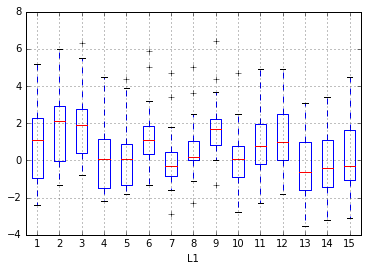

CPU times: user 591 ms, sys: 69.9 ms, total: 661 ms
Wall time: 385 ms


In [118]:
%%time
## 5.2作答: 
def BoxplotFunc(path, ID, DATA, POS):
    data = pd.read_csv(path)
    data = data[data["ID"] == ID]
    data = data[[POS, DATA]]
    dic = {i:data[data[POS]==i][DATA].values for i in range(1,16)}
    new_data = pd.DataFrame(dic)
    new_data.boxplot()
    plt.xlabel(ID)
    plt.show()
BoxplotFunc("output.csv", "L1", "DATA_X", "POS_Y")